In [231]:
import pandas as pd
import numpy as np
import os, random, math, glob
import seaborn as sns
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [232]:
df = pd.read_csv('Train.csv')
df.tail()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000472,0.000000,0.006203,0,0,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.003030,0.000713,0.000000,0.008414,0,0,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.002150,0.001458,0.000000,0.003670,0,0,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.009235,0.007870,0.000000,0.004803,0,0,ZA3453004,-27.913875,22.755314,2.793699
2821,34503005: Ward 5,3008.38687,7899.36498,12.457680,0.254215,0.003310,0.121954,0.000000,0.001770,0.001023,...,0.003107,0.001636,0.000332,0.001770,0,0,ZA3453005,-27.741804,22.856933,0.001200


In [233]:
var_desc = pd.read_csv('variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [234]:
test = pd.read_csv('Test.csv')
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [236]:
le = LabelEncoder()
df['ADM4_PCODE'] = le.fit_transform(df['ADM4_PCODE'])

In [237]:
df.corr()['target'].sort_values(ascending=True)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
            ...   
dw_12          NaN
dw_13          NaN
lan_13         NaN
pw_07          NaN
pw_08          NaN
Name: target, Length: 62, dtype: float64

In [238]:
df.drop(['dw_12','dw_13','lan_13','pw_07','pw_07','pw_08','lan_08'],axis=1,inplace=True)
test.drop(['dw_12','dw_13','lan_13','pw_07','pw_07','pw_08','lan_08'],axis=1,inplace=True)

In [239]:
df.duplicated().any(), test.duplicated().any()

(False, False)

In [247]:
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,Household_Size
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.019968,0.002848,0.007537,0.000000,0.012928,176,-29.682270,24.734743,0.292039,3.516501
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.018946,0.014566,0.057127,0.019092,0.004131,177,-29.119311,24.757737,3.207775,3.877587
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.083010,0.057560,0.010358,0.001421,0.040881,178,-29.142276,25.094093,0.000000,3.025929
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.002689,0.000000,0.000669,0.000000,0.005011,179,-29.372052,24.942867,2.038778,3.294194
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.009699,0.004859,0.001290,0.000673,0.017629,180,-29.409381,25.290165,0.000000,3.846971


In [248]:
df.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,Household_Size
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,...,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000
mean,3665.281214,12869.130053,24.507554,0.712196,0.092616,0.032043,0.006057,0.008665,0.006289,0.022375,...,0.127555,0.041589,0.019655,0.011008,0.110818,1410.500000,-26.880740,28.666515,17.437560,5.163249
std,3266.364522,9696.690518,10.294387,0.214035,0.182852,0.080253,0.019374,0.030697,0.024606,0.037127,...,0.156400,0.057331,0.032926,0.023672,0.185401,814.785555,2.021279,2.373809,18.958621,72.727066
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.490089,16.760022,0.000000,1.254742
25%,1778.858235,7071.205695,16.751556,0.594212,0.002895,0.002407,0.000000,0.000000,0.000000,0.002716,...,0.008673,0.002099,0.000715,0.000159,0.005217,705.250000,-28.569019,27.707932,3.033397,3.246975
50%,2398.249935,9366.989680,24.156670,0.766841,0.010425,0.005762,0.000807,0.000607,0.000865,0.008639,...,0.069065,0.016496,0.005164,0.001459,0.025165,1410.500000,-26.549866,28.959679,9.205572,3.706505
75%,3987.080563,14241.233015,32.226553,0.881708,0.068209,0.027913,0.002538,0.002225,0.003027,0.025218,...,0.183384,0.058626,0.025055,0.009432,0.116638,2115.750000,-25.572130,30.441505,26.890531,4.197986
max,39684.942130,91716.746370,55.528423,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,...,1.000000,0.327393,0.306787,0.228261,0.961523,2821.000000,-22.331267,32.858249,63.000000,3867.000000


In [ ]:
# Average household size - might contain some useful information
df['Household_Size'] = df['total_individuals']/df['total_households']

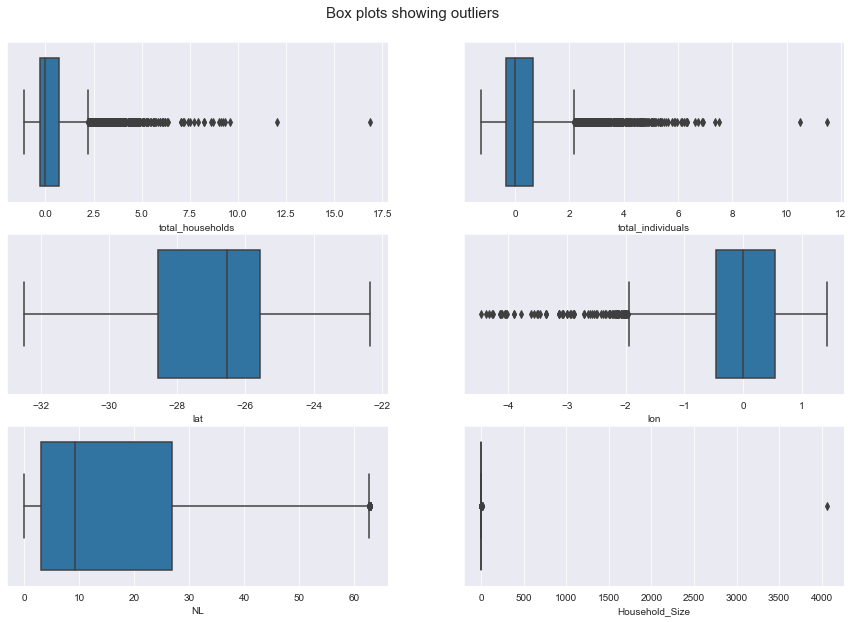

In [260]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), df, ['total_households',	'total_individuals','lat','lon','NL','Household_Size']):
  sns.boxplot(df[name], ax = ax)

In [258]:
rob_scaler = RobustScaler()
df[['total_households','total_individuals','lon','Household_Size']] = rob_scaler.fit_transform(df[['total_households','total_individuals','lon','Household_Size']])

In [259]:
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,Household_Size
0,41601001: Ward 1,-0.327775,-0.485184,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.019968,0.002848,0.007537,0.000000,0.012928,176,-29.682270,-1.545573,0.292039,-0.199791
1,41601002: Ward 2,-0.299452,-0.367035,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.018946,0.014566,0.057127,0.019092,0.004131,177,-29.119311,-1.537161,3.207775,0.179895
2,41601003: Ward 3,0.002412,-0.292041,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.083010,0.057560,0.010358,0.001421,0.040881,178,-29.142276,-1.414115,0.000000,-0.715634
3,41601004: Ward 4,-0.297734,-0.506623,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.002689,0.000000,0.000669,0.000000,0.005011,179,-29.372052,-1.469437,2.038778,-0.433550
4,41601005: Ward 5,-0.302386,-0.377928,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.009699,0.004859,0.001290,0.000673,0.017629,180,-29.409381,-1.342388,0.000000,0.147702


In [261]:
df.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00',
       'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'ADM4_PCODE', 'lat', 'lon', 'NL',
       'Household_Size'],
      dtype='object')

In [304]:
in_cols = ['total_households', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00',
       'pg_02', 'pg_04', 'lgt_00', 'pw_00', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL','Household_Size']
# in_cols

In [305]:
# Specify our target variable
ycol = 'target'

In [306]:
ycol

'target'

In [311]:
# Fit a basic linear regression model, keeping the last 1000 rows for scoring
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[in_cols][:-1000], df[ycol][:-1000])

LinearRegression()

In [312]:
lm.score(df[in_cols][-1000:], df[ycol][-1000:]) # R2 score

-9.537968552738365

In [313]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], lm.predict(df[in_cols][-1000:]))))

RMSE: 30.982634818994057


D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\CRASHOVERRIDE\SOFTWARES\INSTALLED SOFT\CONDA\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


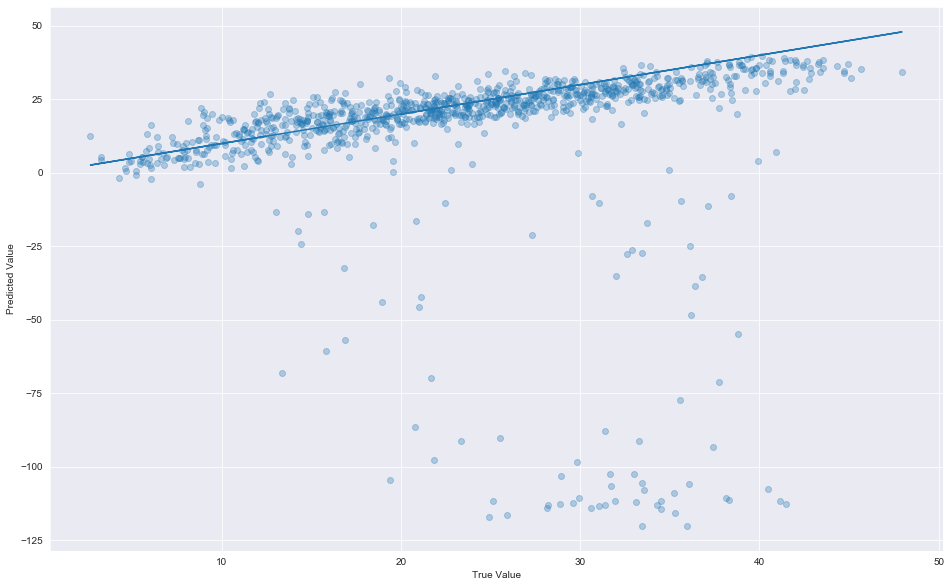

In [314]:
# Plot predicted vs actual
plt.scatter(df[ycol][-1000:], lm.predict(df[in_cols][-1000:]), alpha=0.3)
plt.plot(df[ycol][-1000:], df[ycol][-1000:]) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

In [315]:
from sklearn.ensemble import RandomForestRegressor

In [316]:
rf = RandomForestRegressor(n_estimators=100) # My go-to quick model for regression tasks.
rf.fit(df[in_cols][:-1000], df[ycol][:-1000])

RandomForestRegressor()

In [317]:
rf.score(df[in_cols][-1000:], df[ycol][-1000:]) # Very good!

0.814164011819543

In [318]:
print("RMSE:", sqrt(mean_squared_error(df[ycol][-1000:], rf.predict(df[in_cols][-1000:]))))

RMSE: 4.114383879812137


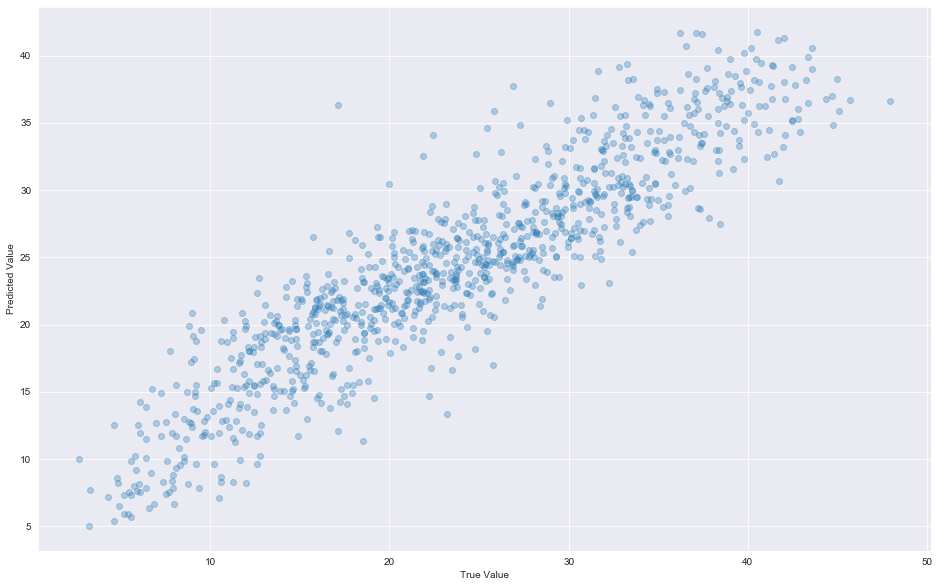

In [319]:
plt.scatter(df[ycol][-1000:], rf.predict(df[in_cols][-1000:]), alpha=0.3)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('pred_vs_actual_quick_rf_sequential_split.png')

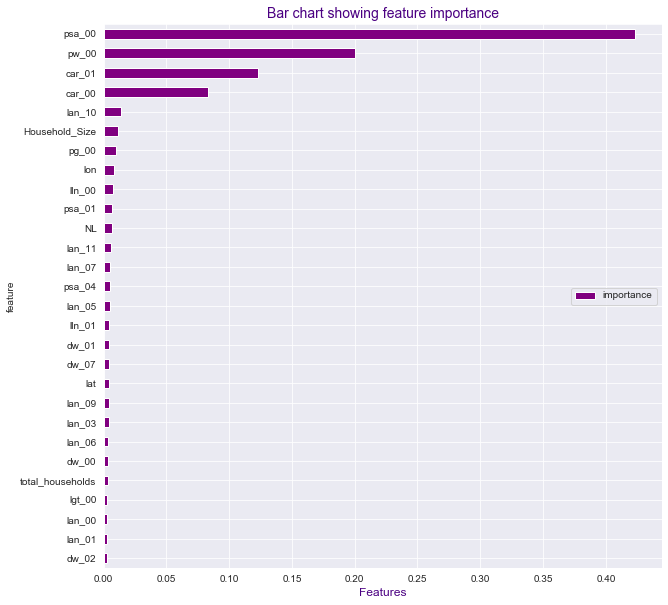

In [320]:
# Feature importance
impo_df = pd.DataFrame({'feature': in_cols, 'importance': rf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:28].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

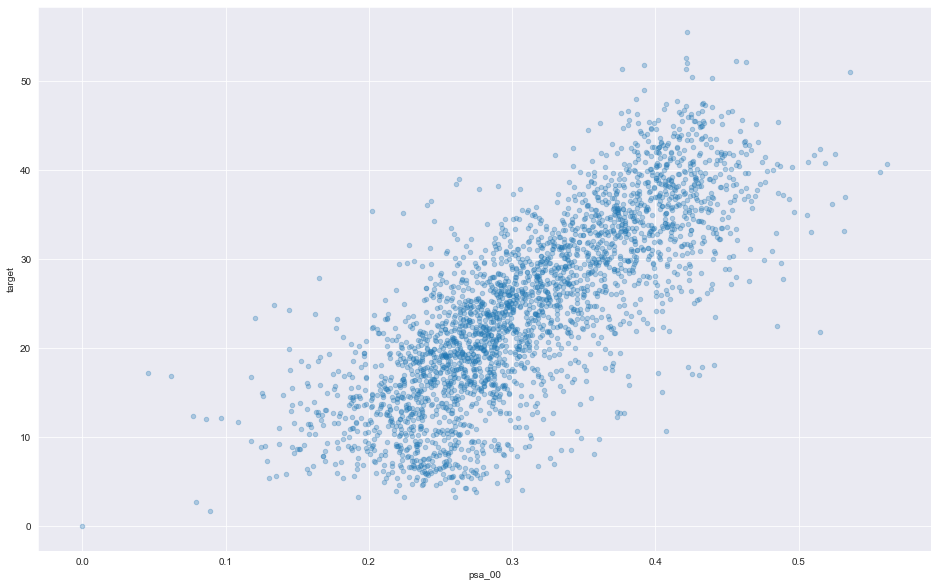

In [321]:
# It turns out school attendance is VERY informative!
df.plot(x='psa_00', y='target', kind='scatter', alpha=0.3)

In [322]:
from sklearn.model_selection import KFold

# Demonstrating splits
kf = KFold(n_splits=10, shuffle=False)
for train, test in kf.split(df):
  print(df.iloc[train].shape, df.iloc[test].shape)

(2539, 58) (283, 58)
(2539, 58) (283, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)
(2540, 58) (282, 58)


In [323]:
# Using this to test a model on 5 different splits
kf = KFold(n_splits=10, shuffle=False)

scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

4.355147057171353
2.799796783200889
2.6687173313854986
3.864905149588033
4.971173396526701
4.318052153553995
4.821827687206404
4.211294747661517
3.998165798435443
3.688144086931939
Average score in 10-fold CV: 3.9697224191661773


In [324]:
# Now Shuffle=True
kf = KFold(n_splits=10, shuffle=True)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

3.334909989091902
3.517763582289716
3.6683975744979826
3.2666362657896157
3.2504095641484203
3.6671545050188348
3.4080357792470157
3.3396922866099024
3.6078262255796876
3.4811448298385286
Average score in 10-fold CV: 3.4541970602111602


In [325]:
# ///////////////////////////////////////////////////////////////////////////////////////////////////

In [327]:
in_cols = ['Household_Size','total_households', 'total_individuals', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00',
       'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02',
       'pw_03', 'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL']
# in_cols

In [328]:
# Now Shuffle=True
kf = KFold(n_splits=10, shuffle=True)
scores = []
for train, test in kf.split(df):
  rf = RandomForestRegressor(n_estimators=100)
  rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
  rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
  scores.append(rmse)
  print(rmse)

print("Average score in 10-fold CV:", np.mean(scores))

3.477331496425631
3.512465831529959
3.172660642626183
3.4142413106921863
3.7155053600861163
3.5515495000675568
3.2000454364253557
3.520234355475645
3.210772854875164
3.5453661667338414
Average score in 10-fold CV: 3.4320172954937638


In [335]:
for md in [3, 4, 5, 7, 9, 12, 15]:
  scores = []
  for train, test in kf.split(df):
    rf = RandomForestRegressor(n_estimators=100, max_depth=md)
    rf.fit(df[in_cols].iloc[train], df[ycol].iloc[train])
    rmse = sqrt(mean_squared_error(df[ycol].iloc[test], rf.predict(df[in_cols].iloc[test])))
    scores.append(rmse)
  print("Average score in 10-fold CV:", np.mean(scores), "for max depth:", md)

Average score in 10-fold CV: 4.672322544425071 for max depth: 3
Average score in 10-fold CV: 4.243998056882286 for max depth: 4
Average score in 10-fold CV: 3.9403561253010944 for max depth: 5
Average score in 10-fold CV: 3.642432180568035 for max depth: 7
Average score in 10-fold CV: 3.5290741241112284 for max depth: 9
Average score in 10-fold CV: 3.459115592321351 for max depth: 12
Average score in 10-fold CV: 3.443234371706544 for max depth: 15


In [336]:
pd.read_csv('SampleSubmission.csv').head()

,ward,target
0,21001001: Ward 1,21.87
1,21001002: Ward 2,65.94
2,21001003: Ward 3,83.65
3,21001004: Ward 4,NaN
4,21001005: Ward 5,NaN


In [337]:
# Load the test data
test = pd.read_csv('Test.csv')
# Add any extra features just as we did for train
test['Household_Size'] = test['total_individuals']/test['total_households']

In [338]:
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,Household_Size
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,3.491145
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,3.489015
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,5.348808
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,4.725482
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,4.735724


In [339]:
# Fit a model on the whole training set, using our best parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=15)
rf.fit(df[in_cols], df[ycol])

RandomForestRegressor(max_depth=15)

In [332]:
test['ADM4_PCODE'] = le.fit_transform(test['ADM4_PCODE'])

In [341]:
# Make predictions
test['target'] = rf.predict(test[in_cols])
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,Household_Size,target
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,3.491145,19.208639
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,3.489015,15.909466
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,5.348808,21.437299
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,4.725482,15.320620
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,4.735724,22.169247


In [342]:
# Save and submit!
test[['ward', 'target']].to_csv('submissions/9th_submission.csv', index=False)